In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("CSV_Files/track OL vs WCh.csv")

In [3]:
df.head(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Athlete,Nation,Time,Notes,Wind m/s
0,Olympics,2021,Run,100,M,1,3.0,Marcell Jacobs,�Italy,9.8,AR,0.0
1,Olympics,2021,Run,100,M,2,5.0,Fred Kerley,�United States,9.84,PB,0.0
2,Olympics,2021,Run,100,M,3,9.0,Andre De Grasse,�Canada,9.89,PB,0.0
3,Olympics,2021,Run,100,M,4,2.0,Akani Simbine,�South Africa,9.93,NaN,0.0
4,Olympics,2021,Run,100,M,5,7.0,Ronnie Baker,�United States,9.95,NaN,0.0
5,Olympics,2021,Run,100,M,6,6.0,Su Bingtian,�China,9.98,NaN,0.0


In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
df.head(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Athlete,Nation,Time,Notes,Wind m/s
0,Olympics,2021,Run,100,M,1,3.0,Marcell Jacobs,�Italy,9.8,AR,0.0
1,Olympics,2021,Run,100,M,2,5.0,Fred Kerley,�United States,9.84,PB,0.0
2,Olympics,2021,Run,100,M,3,9.0,Andre De Grasse,�Canada,9.89,PB,0.0
3,Olympics,2021,Run,100,M,4,2.0,Akani Simbine,�South Africa,9.93,NaN,0.0
4,Olympics,2021,Run,100,M,5,7.0,Ronnie Baker,�United States,9.95,NaN,0.0
5,Olympics,2021,Run,100,M,6,6.0,Su Bingtian,�China,9.98,NaN,0.0


In [7]:
df.tail(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Athlete,Nation,Time,Notes,Wind m/s
450,World Championship,2019,Hurdles,400,F,3,5.0,Rushell Clayton,�Jamaica�(JAM),53.74,PB,0.0
451,World Championship,2019,Hurdles,400,F,4,9.0,L�a Sprunger,�Switzerland�(SUI),54.06,NR,0.0
452,World Championship,2019,Hurdles,400,F,5,8.0,Zuzana Hejnov�,�Czech Republic�(CZE),54.23,NaN,0.0
453,World Championship,2019,Hurdles,400,F,6,2.0,Ashley Spencer,�United States�(USA),54.45,NaN,0.0
454,World Championship,2019,Hurdles,400,F,7,3.0,Anna Ryzhykova,�Ukraine�(UKR),54.45,SB,0.0
455,World Championship,2019,Hurdles,400,F,8,7.0,Sage Watson,�Canada�(CAN),54.82,NaN,0.0


In [8]:
df.isnull().sum()

Where         0
Year          0
Event         0
Distance      0
Sex           0
Rank         14
Lane        255
Athlete       0
Nation        0
Time          4
Notes       276
Wind m/s      0
dtype: int64

In [9]:
df.shape

(456, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Where     456 non-null    object 
 1   Year      456 non-null    int64  
 2   Event     456 non-null    object 
 3   Distance  456 non-null    int64  
 4   Sex       456 non-null    object 
 5   Rank      442 non-null    object 
 6   Lane      201 non-null    float64
 7   Athlete   456 non-null    object 
 8   Nation    456 non-null    object 
 9   Time      452 non-null    object 
 10  Notes     180 non-null    object 
 11  Wind m/s  456 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 42.9+ KB


<AxesSubplot:>

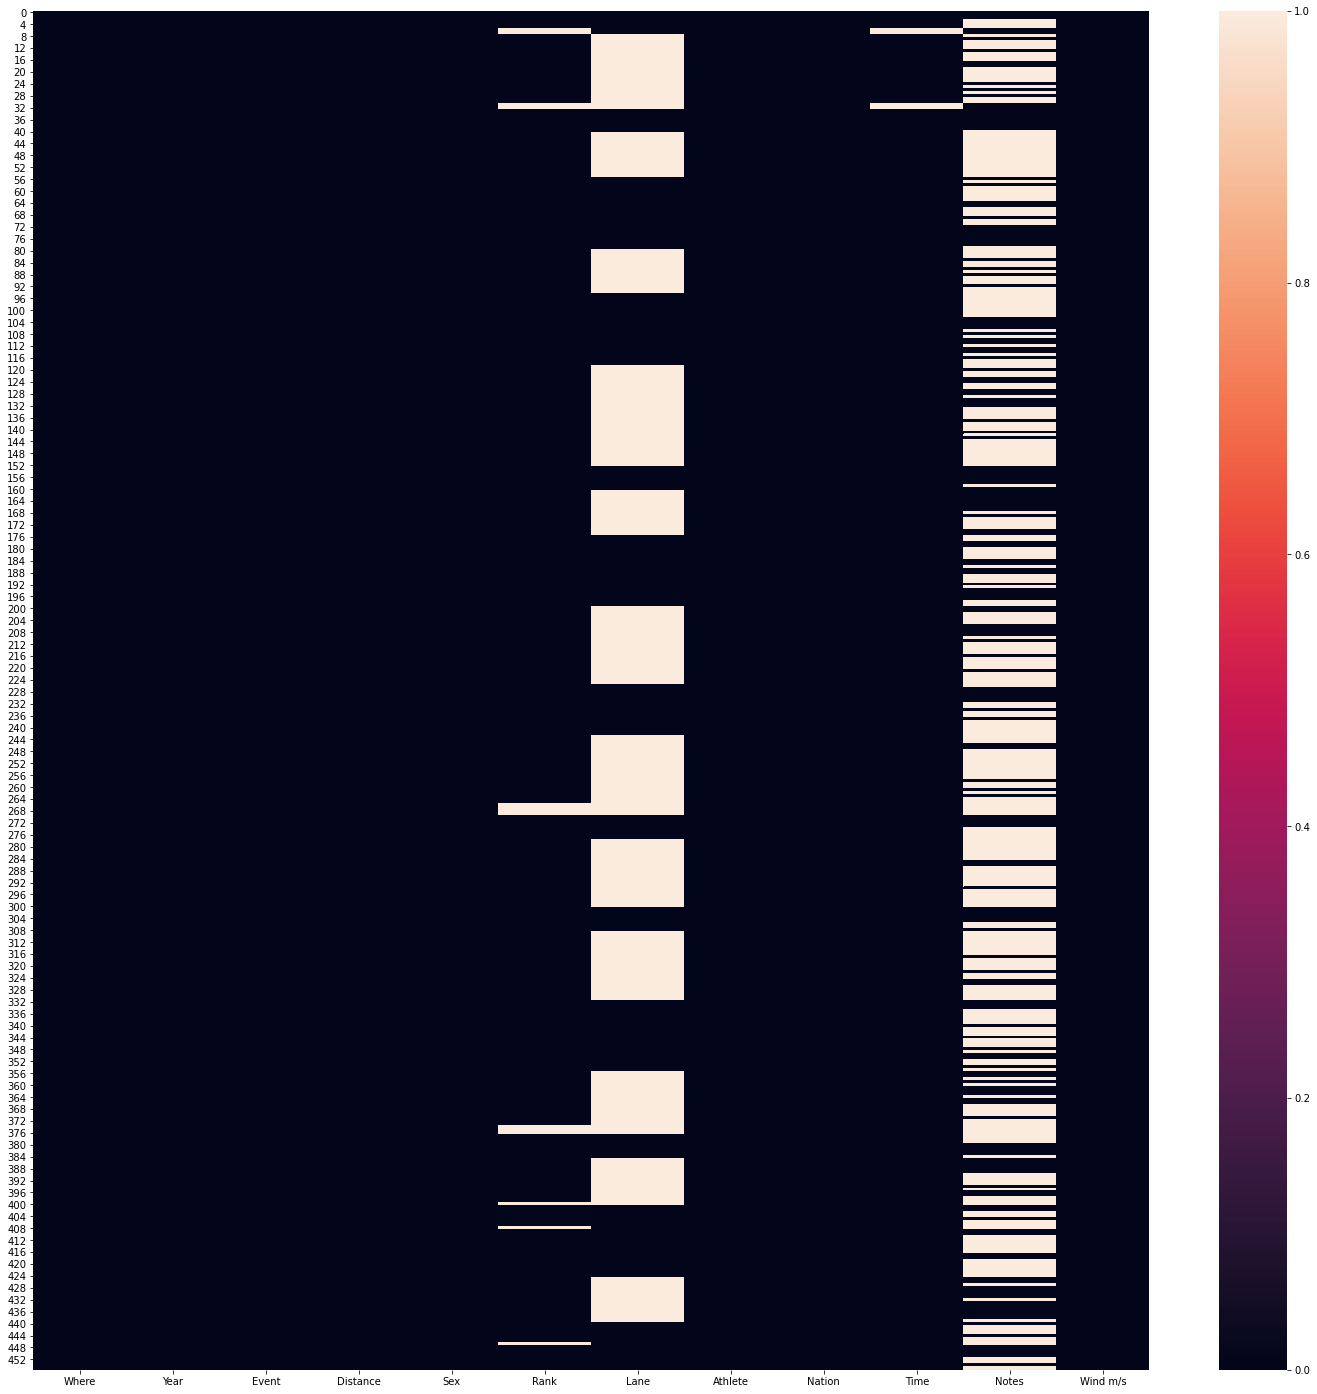

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [18]:
null_values = df.isnull().sum() /df.shape[0]*100
null_values

Where        0.000000
Year         0.000000
Event        0.000000
Distance     0.000000
Sex          0.000000
Rank         3.070175
Lane        55.921053
Athlete      0.000000
Nation       0.000000
Time         0.877193
Notes       60.526316
Wind m/s     0.000000
dtype: float64

In [26]:
drop_columns = null_values[null_values > 17].keys()
drop_columns

Index(['Lane', 'Notes'], dtype='object')

In [27]:
df2_drop_columns = df.drop(columns = drop_columns)
df2_drop_columns.shape

(456, 10)

<AxesSubplot:>

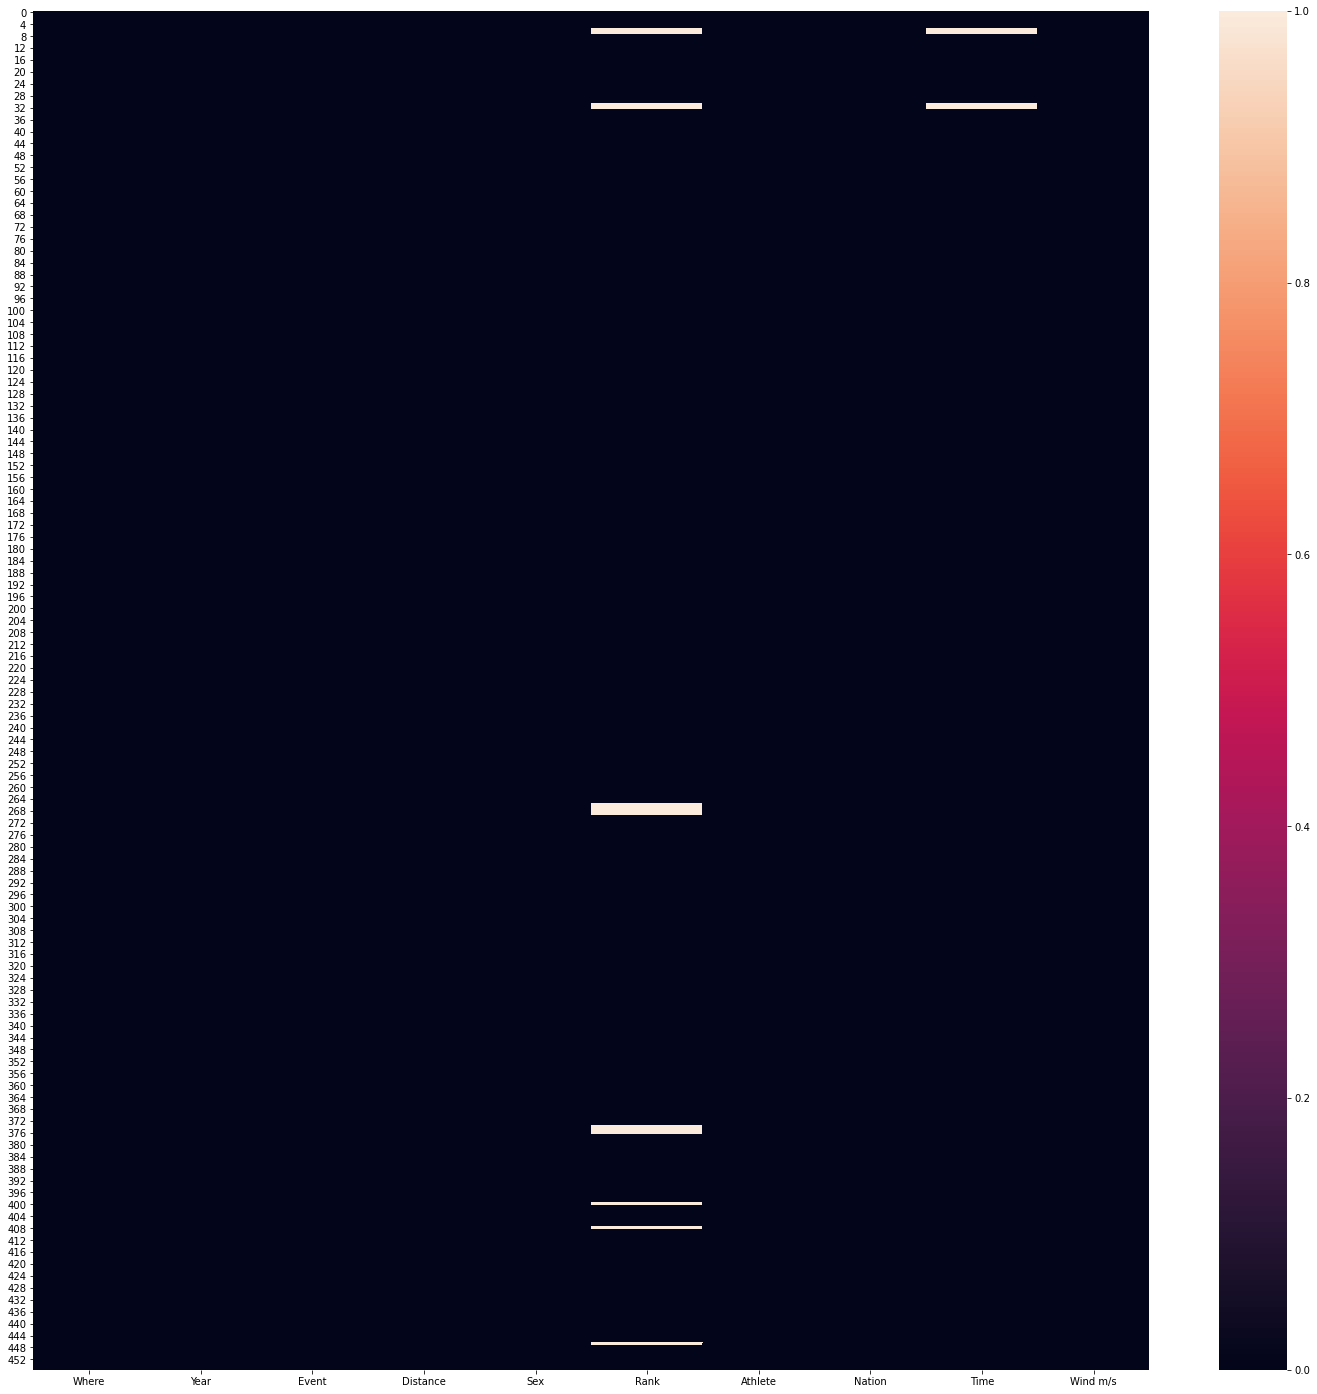

In [29]:
plt.figure(figsize=(25,25))
sns.heatmap(df2_drop_columns.isnull())

In [30]:
df3_drop_rows = df2_drop_columns.dropna()

In [31]:
df3_drop_rows.shape

(442, 10)

<AxesSubplot:>

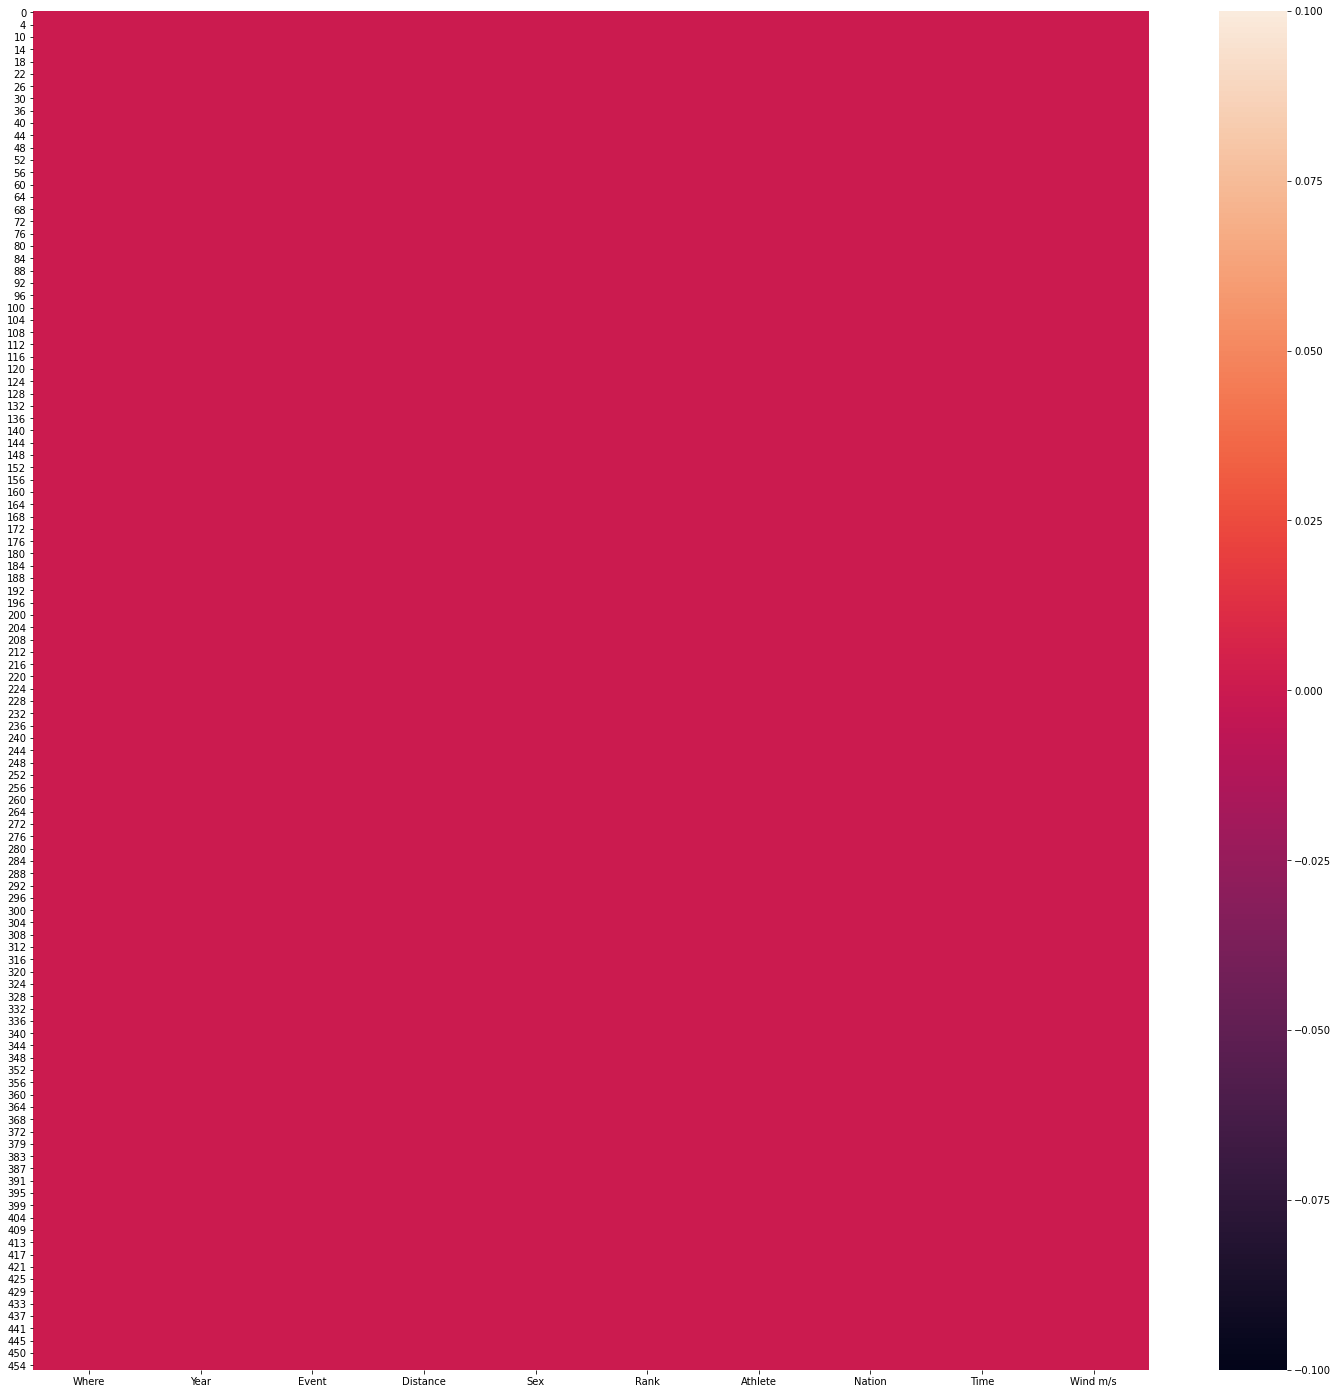

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [36]:
df3_drop_rows.isnull().sum().sum()

0

In [37]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Distance', 'Wind m/s'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

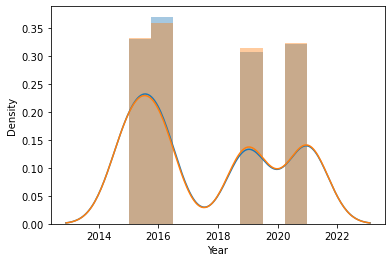

In [40]:
sns.distplot(df3_drop_rows['Year'])
sns.distplot(df['Year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

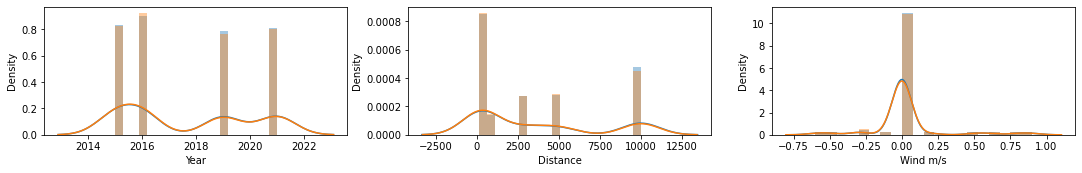

In [42]:
num_var = ['Year', 'Distance', 'Wind m/s']
plt.figure(figsize=(25,25))
for i, var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var],bins=20)
    sns.distplot(df3_drop_rows[var],bins=20)

In [44]:
df.shape

(456, 12)

In [45]:
df3_drop_rows.shape

(442, 10)